In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

### Your code is here



In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

In [10]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [32]:

corr_2 = X.corrwith(pca_corr.PCA_2)
corrs = pd.concat((corr_1,corr_2), axis = 1)

<AxesSubplot:>

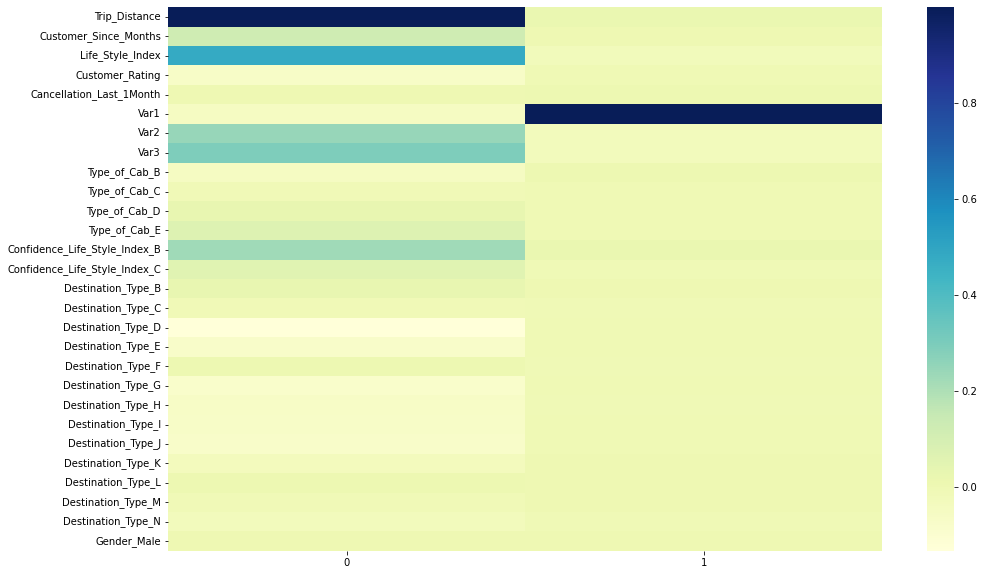

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(corrs, cmap="YlGnBu")

In [41]:
### Your code is here
corrs

,0,1
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

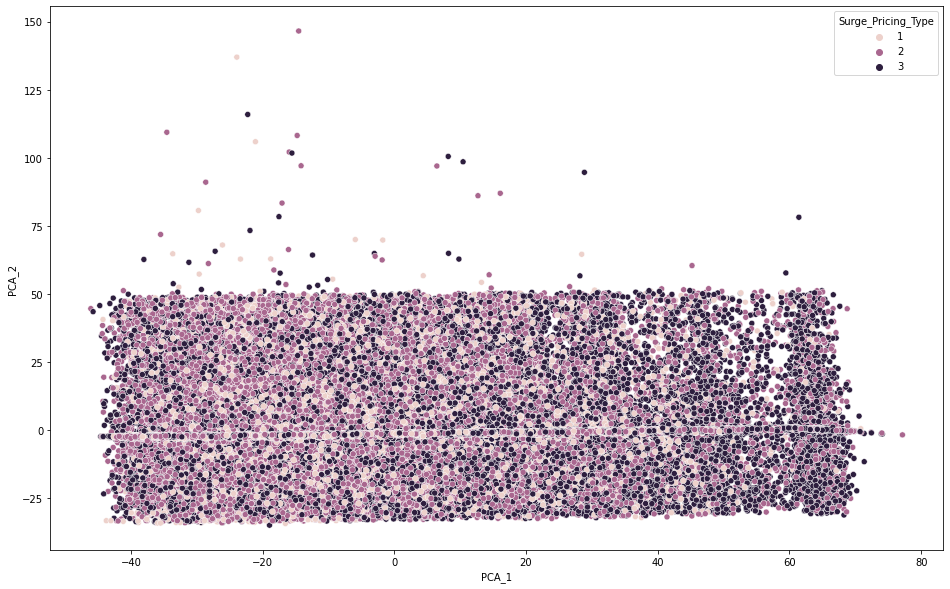

In [45]:
### Your code is here
plt.figure(figsize=(16,10))
sns.scatterplot(data = pca, x = 'PCA_1', y = 'PCA_2', hue = y)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [46]:
### Your code is here
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_centered)
pca_3 = pd.DataFrame(X_pca_3, columns=['PCA_1', 'PCA_2', 'PCA_3'])
corr_3 = X.corrwith(pca_3.PCA_3)

In [87]:
PCA_3 = pca_3['PCA_3']
pca_3.corrwith(PCA_3)

PCA_1    2.683885e-17
PCA_2    3.111931e-16
PCA_3    1.000000e+00
dtype: float64

In [88]:
X.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Male'],
      dtype='object')

In [92]:
np.var([X['Life_Style_Index'], X['Customer_Since_Months']])

8.88615538411737

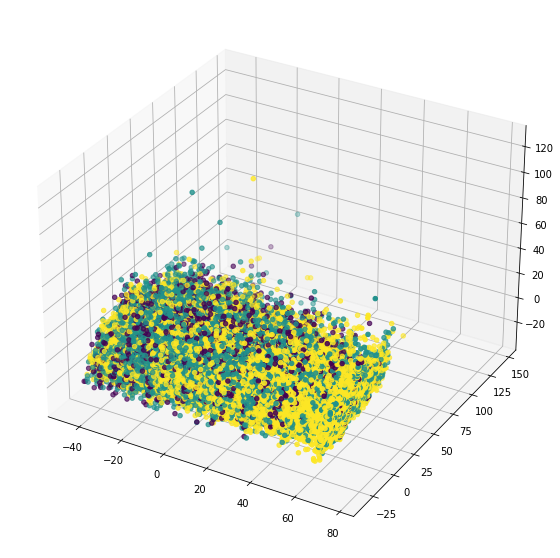

In [51]:
plt.figure(figsize=(16,10))
axes = plt.axes(projection='3d')
axes.scatter3D(pca_3.PCA_1, pca_3.PCA_2, pca_3.PCA_3, c=y)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [52]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [56]:
pipe_pca = Pipeline([('scaler', StandardScaler()),
                    ('pca',PCA(n_components=2)),
                    ('logreg', LogisticRegression())])
pipe_center = Pipeline([('scaler', StandardScaler()),
                    ('logreg', LogisticRegression())])

In [62]:
### Your code is here
param_grid = {'logreg__penalty': ['l1', 'l2', 'elasticnet'],
              'logreg__C': [1e-5, 0.0001, 0.001, 0.01]}
gs_pca = GridSearchCV(estimator=pipe_pca,
                      param_grid=param_grid,
                      verbose=2)
gs_pca.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.6s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.6s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.6s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.6s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.6s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.2s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.3s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.2s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.2s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.3s
[CV] END ........logreg__C=1e-05, logreg__penalty=elasticnet; total time=   0.6s
[CV] END ........logreg__C=1e-05, logreg__penalt

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [1e-05, 0.0001, 0.001, 0.01],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [63]:
gs_center = GridSearchCV(estimator=pipe_center,
                      param_grid=param_grid,
                      verbose=2)
gs_center.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l1; total time=   0.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.0s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.1s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.4s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.1s
[CV] END ................logreg__C=1e-05, logreg__penalty=l2; total time=   1.4s
[CV] END ........logreg__C=1e-05, logreg__penalty=elasticnet; total time=   0.0s
[CV] END ........logreg__C=1e-05, logreg__penalt

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [1e-05, 0.0001, 0.001, 0.01],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [64]:
from sklearn.metrics import f1_score, accuracy_score

In [65]:
y_pca = gs_pca.predict(X_test)
y_center = gs_center.predict(X_test)

In [ ]:
print('PCA', f'accuracy:{accuracy_score(y_test,y_pca):.3}',
     f'accuracy:{f1_score(y_test,y_pca):.3}')
print('CENTER', f'accuracy:{accuracy_score(y_test,y_center):.3}',
     f'accuracy:{f1_score(y_test,y_center):.3}')

In [68]:
from sklearn.metrics import  classification_report

In [71]:
print(classification_report(y_test,y_pca, digits=3))
print(classification_report(y_test,y_center, digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [72]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [73]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    ret = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = ret[0]
    f1_score_dict[n_components] = ret[1]
    ### Your code is here
    
    

CPU times: total: 3min 59s
Wall time: 4min 40s


In [82]:
f1_score_dict

{2: 0.42539601180945336,
 4: 0.47373121331460993,
 8: 0.5201254610241981,
 16: 0.5274627898778056,
 28: 0.6760757307801638}

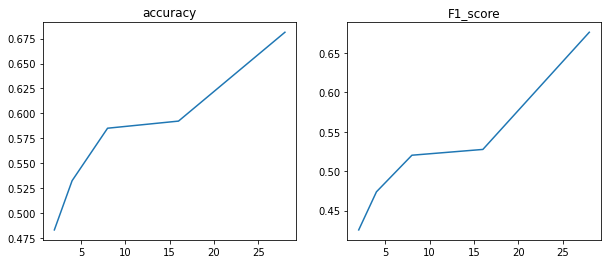

In [81]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax0.set_title('accuracy')
ax0.plot(components_list, accuracy_dict.values())

ax1.set_title('F1_score')
ax1.plot(components_list, f1_score_dict.values())

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [97]:
X.shape
X_tsne = X[:2000]
X_tsne.shape

(2000, 28)

In [104]:
y_tsne = y[:2000]

In [107]:
from sklearn.manifold import TSNE

### Your code is here
tsne = TSNE(perplexity=50.0, early_exaggeration=20)
vizual = tsne.fit_transform(X_tsne)

<AxesSubplot:xlabel='TSNE_1', ylabel='TSNE_2'>

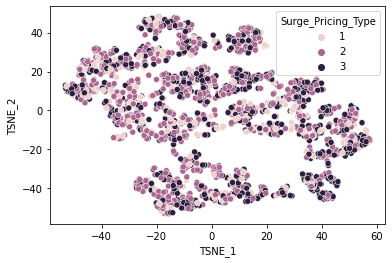

In [106]:
vizual = pd.DataFrame(vizual, columns = ['TSNE_1', 'TSNE_2'])
sns.scatterplot(data = vizual, x = 'TSNE_1', y = 'TSNE_2', hue=y_tsne)

<AxesSubplot:xlabel='TSNE_1', ylabel='TSNE_2'>

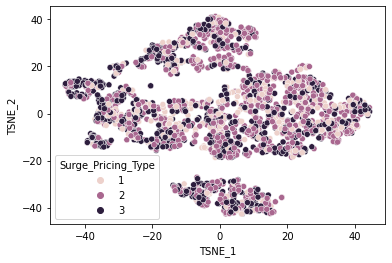

In [108]:
vizual = pd.DataFrame(vizual, columns = ['TSNE_1', 'TSNE_2'])
sns.scatterplot(data = vizual, x = 'TSNE_1', y = 'TSNE_2', hue=y_tsne)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!